In [1]:
import os
import sys

import numpy  as np
import tables as tb
import pandas as pd
import matplotlib
import math

#the line below makes the plot as a pop-up, that can be saved
#matplotlib.use('TkAgg')

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as clrs

import matplotlib.cm as cm
from matplotlib.colors import Normalize

from IC.invisible_cities.evm.event_model        import Cluster, Hit
from IC.invisible_cities.types.ic_types         import xy
from IC.invisible_cities.reco.paolina_functions import voxelize_hits

from IC.invisible_cities.core.exceptions import NoHits

In [2]:
import functions.histo_functions as myhf
import functions.efficiency_functions as myef
import functions.recovstrue as myrvt

In [3]:
filepath = '/Users/halmamol/NEXT/files/NEXT100/'
event = '0nubb'

In [4]:
#Check limits of the Energy ROI 

emin = 2.40
emax = 2.54

## BEERSHEBA files

In [5]:
npz_path = '/Users/halmamol/NEXT/NBarrays/'
npz_filename_DS_CM = f'ereco_DETSIM_R21mm_202012.npz' 
d_DS_CM = np.load(npz_path+npz_filename_DS_CM)
reco_0nubb_e_DS_CM = d_DS_CM['reco_0nubb_e']

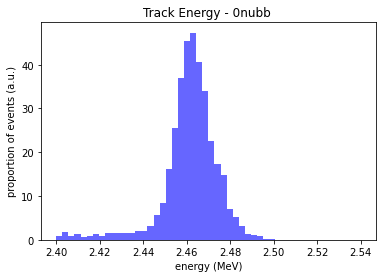

In [6]:
plt.hist(reco_0nubb_e_DS_CM[0], bins = 50, range = (emin, emax), density=True, alpha=0.6, color='b', label = 'detsim-CM')
plt.xlabel('energy (MeV)')
plt.ylabel('proportion of events (a.u.)')
plt.title(f'Track Energy - 0nubb ')

plt.show()

## DETSIM files

In [7]:
#FULLSIM files
track_list = []

#loop over all the files, to read 'Tracks' information
for nfile in range(1,1000):
    
    filename_DS = filepath+f'esmeraldaDS_202012/{event}/esmeralda_{nfile}_0nubb.h5'
    try:
        readfile = pd.read_hdf(filename_DS, 'Tracking/Tracks')
    except:
        print('File {} not good'.format(filename_DS))
        continue
        
    track_list.append(readfile)


track_list_DS = pd.concat([dt for dt in track_list]) 
track_list_DS.columns  

Index(['event', 'trackID', 'energy', 'length', 'numb_of_voxels',
       'numb_of_hits', 'numb_of_tracks', 'x_min', 'y_min', 'z_min', 'r_min',
       'x_max', 'y_max', 'z_max', 'r_max', 'x_ave', 'y_ave', 'z_ave', 'r_ave',
       'extreme1_x', 'extreme1_y', 'extreme1_z', 'extreme2_x', 'extreme2_y',
       'extreme2_z', 'blob1_x', 'blob1_y', 'blob1_z', 'blob2_x', 'blob2_y',
       'blob2_z', 'eblob1', 'eblob2', 'ovlp_blob_energy', 'vox_size_x',
       'vox_size_y', 'vox_size_z'],
      dtype='object')

In [8]:
track_list_DS

,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,...,blob1_z,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z
0,0,0,2.460918,171.279551,147,602,1,-272.125,-365.425,309.341531,...,333.058687,-241.025,-209.925,315.137324,0.111693,0.099472,0.0,13.995000,14.513333,12.484740
1,1,0,0.878916,73.214583,44,202,1,412.075,-194.375,85.219656,...,118.476580,443.175,-194.375,117.209928,0.120217,0.045598,0.0,12.958333,13.606250,12.402979
2,2,0,2.455268,113.987415,128,597,1,85.525,-163.275,785.153688,...,823.509840,194.375,-101.075,806.170929,0.108300,0.103126,0.0,14.136364,13.328571,13.878125
3,3,0,1.795673,97.870916,90,442,1,194.375,163.275,925.202750,...,931.445168,194.375,194.375,954.446893,0.127083,0.051948,0.0,13.822222,13.606250,13.206583
4,4,0,2.481713,104.479899,116,534,1,-458.725,-85.525,642.178188,...,716.267093,-396.525,-69.975,648.360047,0.124281,0.092657,0.0,13.822222,13.822222,13.614427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,9985,0,1.921263,111.421452,83,348,1,225.475,-132.175,216.228219,...,221.822543,225.475,-69.975,223.718669,0.106039,0.066595,0.0,14.254167,14.136364,10.722234
6,9986,0,2.460062,110.466076,112,501,1,209.925,-7.775,1043.181750,...,1060.649717,209.925,23.325,1066.860103,0.109849,0.099901,0.0,14.136364,13.995000,12.532333
7,9987,0,2.458559,128.196136,133,599,1,-101.075,85.525,332.126125,...,353.459842,23.325,147.725,338.369331,0.137081,0.074932,0.0,14.136364,13.995000,12.485479
8,9988,0,2.077405,90.728512,80,452,1,-101.075,-287.675,799.162188,...,822.349219,-101.075,-256.575,829.783585,0.121849,0.090084,0.0,13.822222,13.822222,13.905417


In [9]:
#Dimensions for the NEXT100 detector
veto_N100 = 20 # mm
rmax_N100 = 400
zmin_N100 = veto_N100
zmax_N100 = 1205 - veto_N100

In [10]:
len(track_list_DS)

11373

In [11]:
nonfiducial_list = track_list_DS[~((track_list_DS.r_max < rmax_N100) & 
                                     (track_list_DS.z_min > zmin_N100) & 
                                     (track_list_DS.z_max < zmax_N100))].event.unique()

#Then I apply the selection into the matrix of elements
fiducial_tracks = track_list_DS[(track_list_DS.r_max < rmax_N100) & 
                                     (track_list_DS.z_min > zmin_N100) & 
                                     (track_list_DS.z_max < zmax_N100)]

# I get a list of true elements if event ID is not in the above list 'nonfiducial_list'
evt_fid_sel    = ~fiducial_tracks.event.isin(nonfiducial_list) 

# And finally I select the events with an asigned True from the previous line 
tracks_list_DS_fiducial = fiducial_tracks[evt_fid_sel]

In [12]:
len(tracks_list_DS_fiducial)

5049

In [13]:
track_list_DS_1track = track_list_DS[track_list_DS.numb_of_tracks == 1]
track_list_DS_1trackfid = tracks_list_DS_fiducial[tracks_list_DS_fiducial.numb_of_tracks == 1]

In [14]:
len(track_list_DS_1trackfid)

3797

In [15]:
#Check limits of the Energy ROI 

emin = 2.40
emax = 2.54

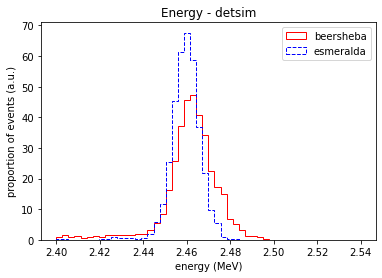

In [16]:
#Selecting events in the ROI
track_list_DS_ROI = track_list_DS_1trackfid[(track_list_DS_1trackfid.energy >= emin) & (track_list_DS_1trackfid.energy <= emax)]

energy_DS = track_list_DS_ROI.energy

plt.hist(reco_0nubb_e_DS_CM[0], bins = 50, range = (emin, emax), density=True, color='red', histtype='step', label = 'beersheba')
plt.hist(energy_DS, bins = 50, range = (emin, emax), density=True, color='blue', histtype='step', label = 'esmeralda', linestyle='dashed')

plt.xlabel('energy (MeV)')
plt.ylabel('proportion of events (a.u.)')
plt.title(f'Energy - detsim')
plt.legend(loc=1);
plt.show()

In [24]:
array_1track = []
events_1track = track_list_DS_1trackfid.event.values
for i in events_1track:
    array_1track.append(i)
events_1track

array([   2,    3,    7, ..., 9986, 9987, 9988], dtype=int32)

In [25]:
filepath = '/Users/halmamol/NEXT/files/NEXT100/beershebaDS_202012/'
max0nubbf = 999
maxselectron = 999
blobR = 21
testID = '_202012'

In [19]:
#0nubb files
track_list_0nubb = []

filepath_0nubb_tracks = filepath+f'0nubb/tracks/{blobR}mm/'

#loop over all the files, to read 'Tracks' information
for nfile in range(1,max0nubbf):
    
    filename_0nubb = filepath_0nubb_tracks+f'next100.0nubb.{nfile}.skel_tracks.R{blobR}mm.h5'
    #the following lines are added because some of the files aren't there (I had to check Paola's notebook)
    try:
        readfile_tracks = pd.read_hdf(filename_0nubb, 'Tracks')
    except:
        print('File {} not good'.format(filename_0nubb))
        continue
        
    track_list_0nubb.append(readfile_tracks)
    

#'concat' command means: 'concatenate pandas objects along a particular 
# axis with optional set logic along the other axes.' -> following line 
# is needed to keep an order between the files

tracks_0nubb = pd.concat([dt for dt in track_list_0nubb]) 
tracks_0nubb.columns  

#these are all the elements inside the file:

Index(['event', 'trackID', 'energy', 'length', 'numb_of_voxels',
       'numb_of_hits', 'numb_of_tracks', 'x_min', 'y_min', 'z_min', 'x_max',
       'y_max', 'z_max', 'r_max', 'x_ave', 'y_ave', 'z_ave', 'extreme1_x',
       'extreme1_y', 'extreme1_z', 'extreme2_x', 'extreme2_y', 'extreme2_z',
       'blob1_x', 'blob1_y', 'blob1_z', 'blob2_x', 'blob2_y', 'blob2_z',
       'eblob1', 'eblob2', 'ovlp_blob_energy', 'vox_size_x', 'vox_size_y',
       'vox_size_z'],
      dtype='object')

In [26]:
tracks_test = tracks_0nubb

In [27]:
evt_fid    = tracks_test.event.isin(events_1track) 
tracks_0nubb_1trackfid = tracks_test[evt_fid]
tracks_0nubb_1trackfid

,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,...,blob1_z,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z
0,2,0,2.454563,102.193483,680,25798,2,98.675,-142.325,783.276438,...,823.001395,167.405769,-107.575000,789.464668,1.025814,0.632989,0.0,4.892857,5.0,4.782479
1,2,1,0.000025,0.000000,1,1,2,48.675,-110.325,823.016313,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.025814,0.632989,-1.0,4.892857,5.0,4.782479
0,3,0,1.795325,101.698437,686,26005,4,194.675,176.675,923.295750,...,931.425929,208.103571,190.175000,955.261782,0.514223,0.168446,0.0,4.777778,4.9,4.973071
1,3,1,0.028717,37.175072,38,952,4,197.675,167.675,989.110000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,0.514223,0.168446,-1.0,4.777778,4.9,4.973071
2,3,2,0.000849,6.843768,4,42,4,237.675,129.675,930.992625,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,0.514223,0.168446,-1.0,4.777778,4.9,4.973071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,9977,3,0.000023,0.000000,1,1,4,72.675,196.675,584.032750,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,0.586827,0.511821,-1.0,4.937500,5.0,4.728144
0,9979,0,2.383634,129.019591,682,26482,4,-259.325,-23.325,839.281250,...,845.306837,-186.250926,-6.958333,876.746585,0.831863,0.727286,0.0,5.000000,5.0,4.538088
1,9979,1,0.073481,38.284271,61,1348,4,-133.325,17.675,841.176688,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,0.831863,0.727286,-1.0,5.000000,5.0,4.538088
2,9979,2,0.000875,7.071068,4,30,4,-288.325,-41.325,843.053000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,0.831863,0.727286,-1.0,5.000000,5.0,4.538088


In [28]:
tracks_0nubb_1trackfid_high = tracks_0nubb_1trackfid[tracks_0nubb_1trackfid.trackID == 0]

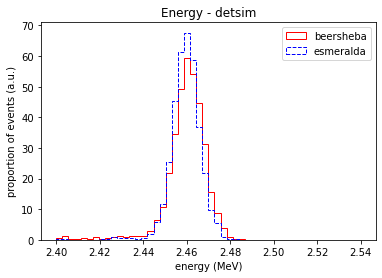

In [29]:
tracks_0nubb_1trackfid_high_ROI = tracks_0nubb_1trackfid_high[(tracks_0nubb_1trackfid_high.energy >= emin) & (tracks_0nubb_1trackfid_high.energy <= emax)]

energy_beershe = tracks_0nubb_1trackfid_high_ROI.energy

plt.hist(energy_beershe, bins = 50, range = (emin, emax), density=True, color='red', histtype='step', label = 'beersheba')
plt.hist(energy_DS, bins = 50, range = (emin, emax), density=True, color='blue', histtype='step', label = 'esmeralda', linestyle='dashed')

plt.xlabel('energy (MeV)')
plt.ylabel('proportion of events (a.u.)')
plt.title(f'Energy - detsim')
plt.legend(loc=1);
plt.show()

In [33]:
print("beersheba Mean = {:.5f} +- {:.5f}".format(np.mean(energy_beershe),
                                              np.std(energy_beershe)/np.sqrt(np.sum(energy_beershe)) ))
print("esmeralda Mean = {:.5f} +- {:.5f} -> FS/DS = {:.2f}%".format(np.mean(energy_DS), 
                                                                        np.std(energy_DS)/np.sqrt(energy_DS),
                                                                        100*np.mean(energy_DS)/ np.mean(energy_DS)))


beersheba Mean = 2.45984 +- 0.00011


TypeError: unsupported format string passed to Series.__format__